In [6]:
#A.Loading and preprocessing the image data
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [11]:
X_train = np.loadtxt("input.csv", delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')   
X_test =  np.loadtxt('input_test.csv', delimiter = ',')
Y_test =  np.loadtxt('labels_test.csv', delimiter = ',')

X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test =  X_test.reshape(len(X_test), 100, 100, 3)
Y_test =  Y_test.reshape(len(Y_test), 1)

X_train,X_test =X_train/255,X_test/255 

In [12]:
#B.defining the model’s architecture
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100, 100, 3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#C.training the model
model.fit(X_train, Y_train, epochs = 5, batch_size = 64)
#D.Estimating the model’s performance
model.evaluate(X_test, Y_test)




Epoch 1/5


32/32 [==============================] - 4s 100ms/step - loss: 0.6985 - accuracy: 0.5170
Epoch 2/5
32/32 [==============================] - 3s 101ms/step - loss: 0.6510 - accuracy: 0.6185
Epoch 3/5
32/32 [==============================] - 3s 98ms/step - loss: 0.5916 - accuracy: 0.6815
Epoch 4/5
32/32 [==============================] - 3s 97ms/step - loss: 0.5452 - accuracy: 0.7355
Epoch 5/5
13/13 [==============================] - 0s 14ms/step - loss: 0.6126 - accuracy: 0.6625


[0.6125595569610596, 0.6625000238418579]

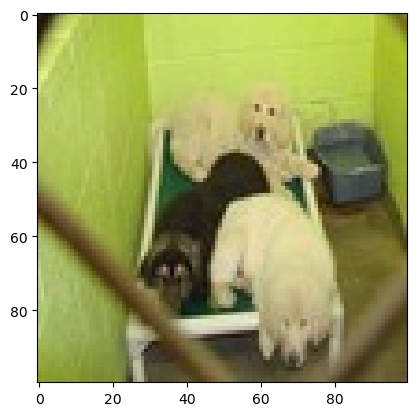

1/1 [==============================] - 0s 25ms/step
Our model says it is a : dog


In [26]:
#D.Estimating the model’s performance
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if(y_pred == 0):
    pred = 'dog'
else:
    pred = 'cat'
print("Our model says it is a :", pred)